# Circos plot of cancer genomics 

This notebook follows closely to [this online tutorial](https://training.galaxyproject.org/training-material/topics/visualisation/tutorials/circos/tutorial.html#example-cancer-genomics).  The datasets are available [here](https://zenodo.org/record/4494146/#.Y0cinnbMIQg) and should be downloaded into the ```data``` directory (which you may have to create).


*Note:* this Jupyter notebook was converted to an R markdown file and then an html file using the following commands in R :

```
rmarkdown::convert_ipynb('circos_r.ipynb')
rmarkdown::render('circos_r.Rmd')
```

___
*Author : Aaron M Geller, Oct. 2022*

# NOTE: add RCircos (or circlize?) to installation instructions
- RCircos docs : https://cran.r-project.org/web/packages/RCircos/vignettes/Using_RCircos.pdf, https://cran.r-project.org/web/packages/RCircos/RCircos.pdf, https://mrcuizhe.github.io/interacCircos_documentation/html/users_from_rcircos.html

In [ ]:
# Run this cell to create the data directory and download the sample data.
# On subsequent runs of this notebook, you can skip this step

directory = file.path(getwd(), 'data')
dir.create(directory)

download.file('https://zenodo.org/record/4494146/files/VCaP_Copy-Number.tsv?download=1', 
    file.path(directory, 'VCaP_Copy-Number.tsv'))
download.file('https://zenodo.org/record/4494146/files/VCaP_B-allele-Frequency.tsv?download=1', 
    file.path(directory, 'VCaP_B-allele-Frequency.tsv'))
download.file('https://zenodo.org/record/4494146/files/VCaP-highConfidenceJunctions.tsv?download=1', 
    file.path(directory, 'VCaP-highConfidenceJunctions.tsv'))
download.file('https://zenodo.org/record/4494146/files/hg18_karyotype_withbands.txt?download=1', 
    file.path(directory, 'hg18_karyotype_withbands.txt'))

In [1]:
library(RCircos)
library(stringr)

In [2]:
# read in the data and define the columns
# skip extra rows at the top that are not useful here
dfChrom <- read.table('data/hg18_karyotype_withbands.txt', sep = "" , header = FALSE, skip = 24)
colnames(dfChrom) <- c('','chromosome','band','','chromStart','chromEnd','Stain')

# reorder to columns for RCircos (and drop a few that are unnecessary)
dfChrom <- dfChrom[, c(2, 5, 6, 3, 7)]

# create a column with the chromosome number or string for sorting
dfChrom$chromosomeID <- gsub("chr","",as.character(dfChrom$chromosome))

# sort by chromosomeID
dfChrom <- dfChrom[str_order(dfChrom$chromosomeID, numeric = TRUE),]

head(dfChrom)

,chromosome,chromStart,chromEnd,band,Stain,chromosomeID
,<chr>,<int>,<int>,<chr>,<chr>,<chr>
1,chr1,0,2300000,p36.33,gneg,1
2,chr1,2300000,5300000,p36.32,gpos25,1
3,chr1,5300000,7100000,p36.31,gneg,1
4,chr1,7100000,9200000,p36.23,gpos25,1
5,chr1,9200000,12600000,p36.22,gneg,1
6,chr1,12600000,16100000,p36.21,gpos50,1



RCircos.Core.Components initialized.
Type ?RCircos.Reset.Plot.Parameters to see how to modify the core components.





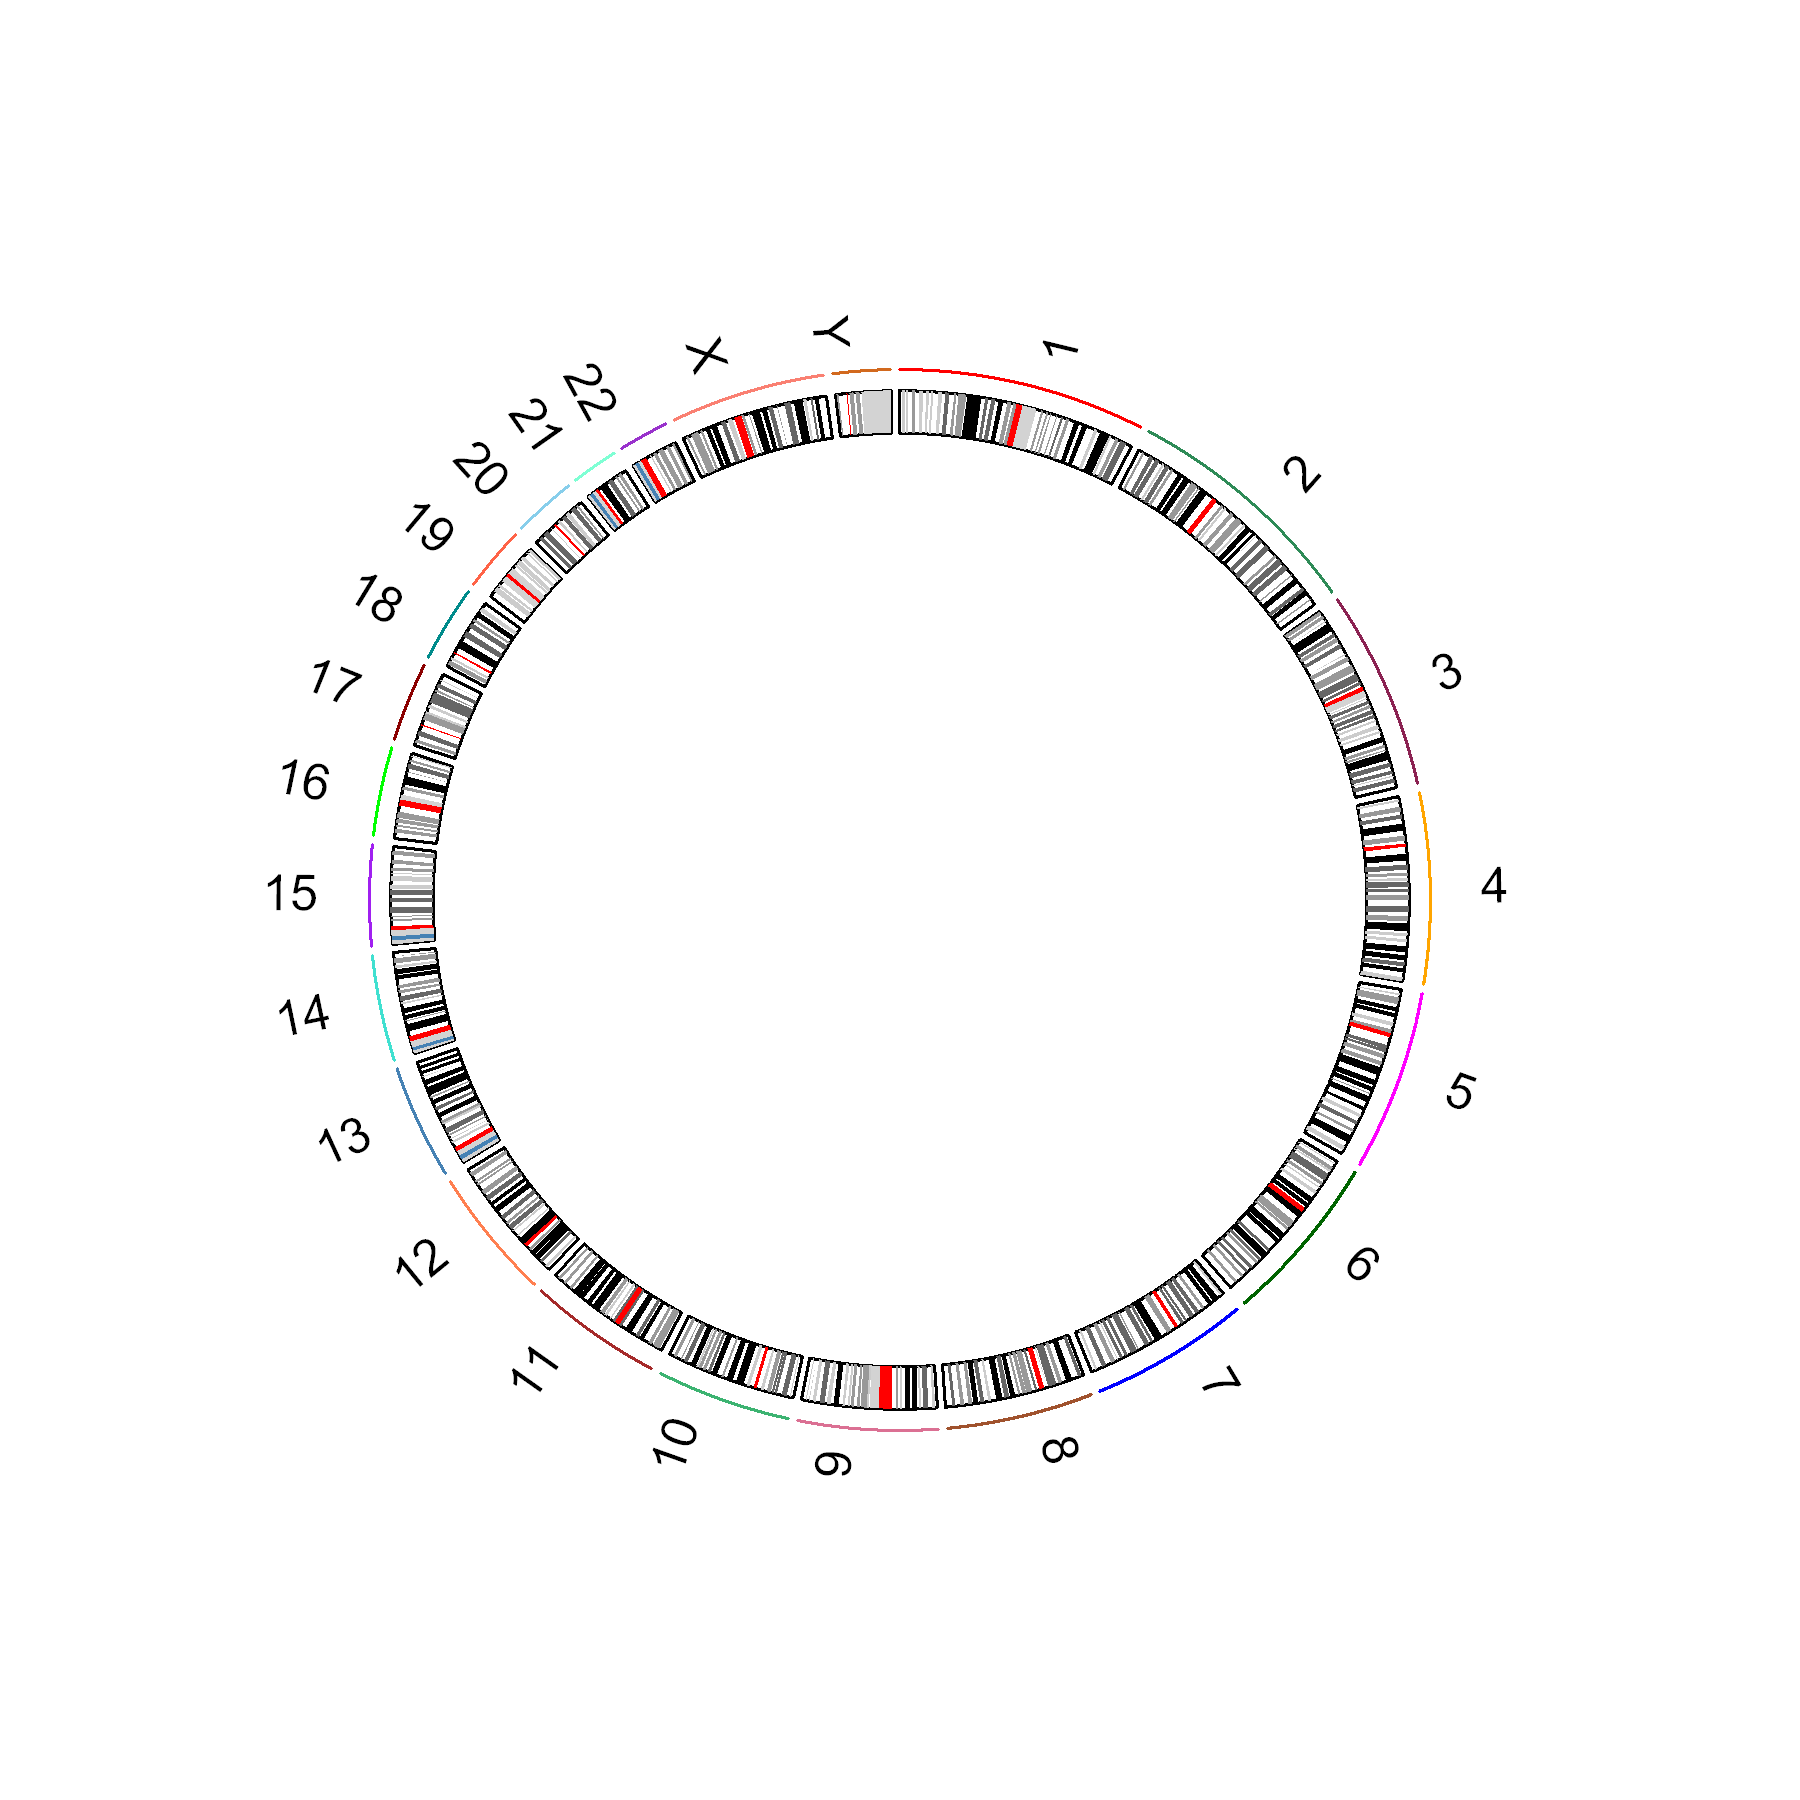

In [32]:
# for displaying in Jupyter
options(jupyter.plot_mimetypes = "image/png", repr.plot.width = 6, repr.plot.height = 6, repr.plot.res = 300)

# add the data to RCircos
RCircos.Set.Core.Components(cyto.info = dfChrom, chr.exclude = NULL, tracks.inside = 4, tracks.outside = 0)
RCircos.Set.Plot.Area()
RCircos.Chromosome.Ideogram.Plot() 

In [37]:
# read in the copy number variation (CNV) data and fix the column names
dfCNV <- read.table('data/VCaP_Copy-Number.tsv', header = TRUE)
colnames(dfCNV) <- c('chromosome','start','stop','value','')

# drop the unnecessary last column
dfCNV <- dfCNV[, c(1, 2, 3, 4)]

# remove any extra chromosomes that are not in the ideogram
extras <- c('chrMT')
dfCNV <- subset(dfCNV, !(chromosome %in% extras))

# create a column with the chromosome number or string for sorting
dfCNV$chromosomeID <- gsub("chr","",as.character(dfCNV$chromosome))

# randomly select 25000 lines (otherwise the plot is too full and takes too long to create)
dfCNV <- dfCNV[sample(nrow(dfCNV), 25000), ]

# sort by chromosomeID
dfCNV <- dfCNV[str_order(dfCNV$chromosomeID, numeric = TRUE),]

head(dfCNV)

,chromosome,start,stop,value,chromosomeID
,<chr>,<int>,<int>,<dbl>,<chr>
21061,chr1,45326612,45326612,0.03300863,1
5439,chr1,11777342,11777342,-0.13918680,1
90573,chr1,229964053,229964053,0.04464692,1
27850,chr1,60627186,60627186,0.03828734,1
67700,chr1,174999371,174999371,-0.49462040,1
54734,chr1,148809752,148809752,0.04181262,1



RCircos.Core.Components initialized.
Type ?RCircos.Reset.Plot.Parameters to see how to modify the core components.





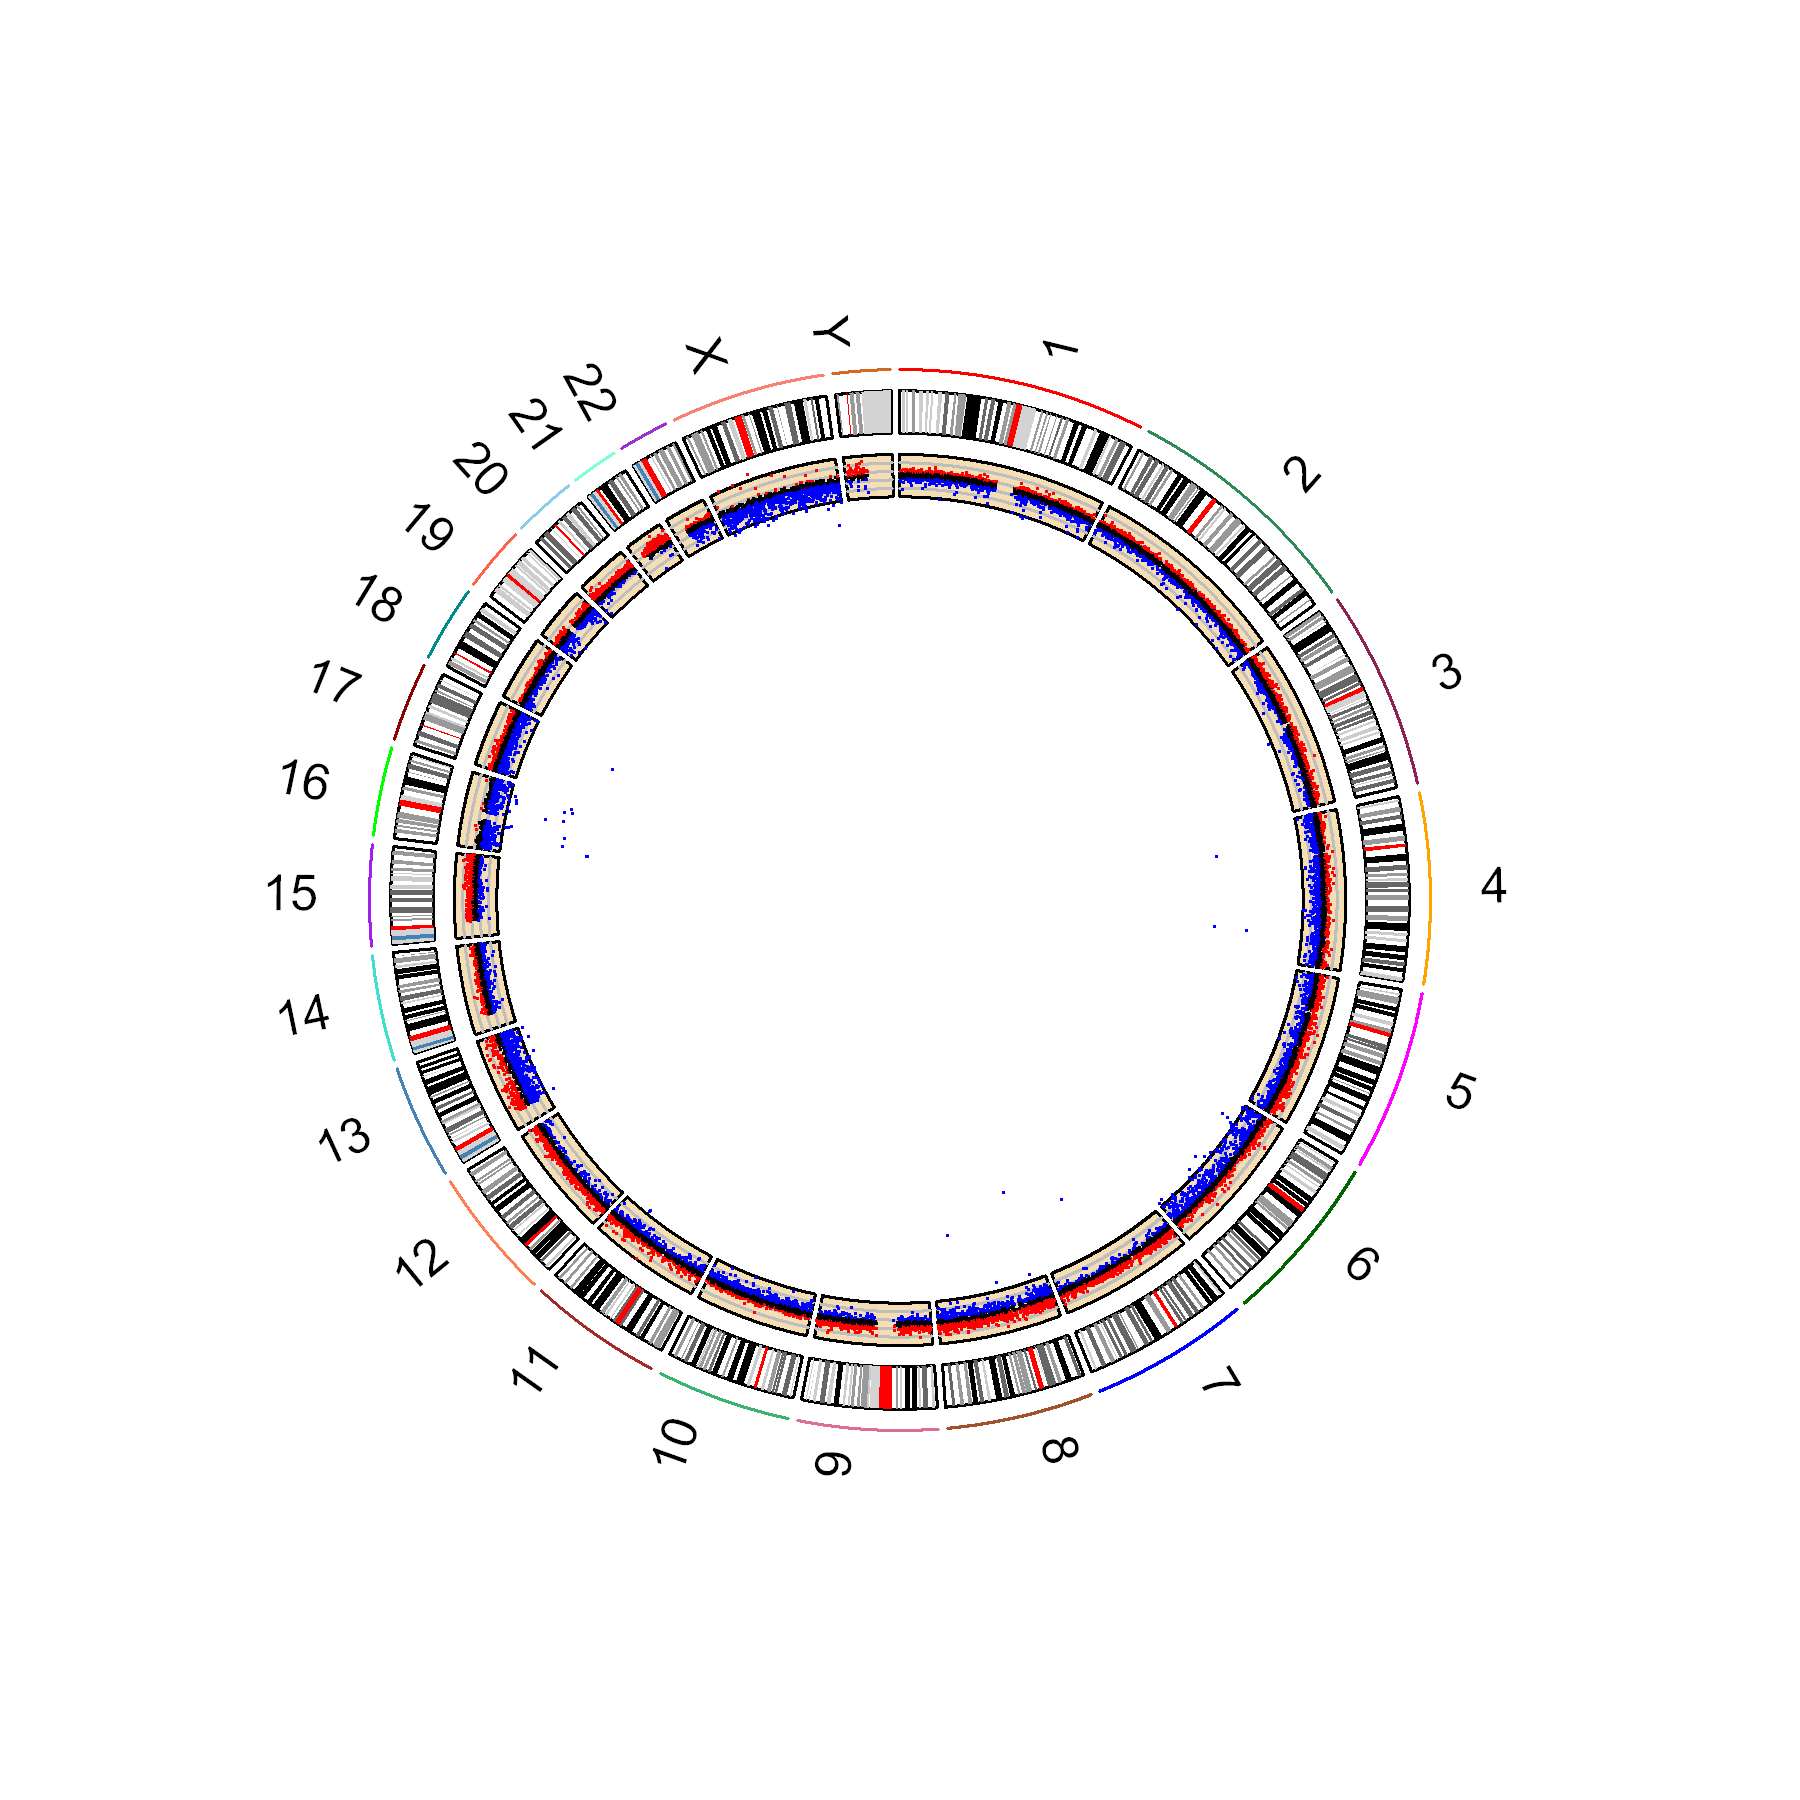

In [34]:
# for displaying in Jupyter
options(jupyter.plot_mimetypes = "image/png", repr.plot.width = 6, repr.plot.height = 6, repr.plot.res = 300)

# add the data to RCircos
RCircos.Set.Core.Components(cyto.info = dfChrom, chr.exclude = NULL, tracks.inside = 4, tracks.outside = 0)
RCircos.Set.Plot.Area()
RCircos.Chromosome.Ideogram.Plot() 
RCircos.Scatter.Plot(dfCNV, data.col = 4, track.num = 1, side = 'in', by.fold = 0.15, min.value = -1, max.value = 1)

In [35]:
# read in the B-allel frequency (BAF) data and fix the column names
dfBAF <- read.table('data/VCaP_B-allele-Frequency.tsv', header = TRUE)
colnames(dfBAF) <- c('chromosome','start','stop','value')

# remove any extra chromosomes that are not in the ideogram
extras <- c('chrMT')
dfBAF <- subset(dfBAF, !(chromosome %in% extras))

# create a column with the chromosome number or string for sorting
dfBAF$chromosomeID <- gsub("chr","",as.character(dfBAF$chromosome))

# randomly select 25000 lines (otherwise the plot is too full and takes too long to create)
dfBAF <- dfBAF[sample(nrow(dfBAF), 25000), ]

# sort by chromosomeID
dfBAF <- dfBAF[str_order(dfBAF$chromosomeID, numeric = TRUE),]

head(dfBAF)

,chromosome,start,stop,value,chromosomeID
,<chr>,<int>,<int>,<dbl>,<chr>
73893,chr1,191731108,191731108,0.9892909,1
19769,chr1,42641989,42641989,0.6831453,1
65818,chr1,170333215,170333215,1.0000000,1
40200,chr1,90998182,90998182,0.7386879,1
66668,chr1,172496927,172496927,0.9965779,1
47388,chr1,108025182,108025182,1.0000000,1



RCircos.Core.Components initialized.
Type ?RCircos.Reset.Plot.Parameters to see how to modify the core components.





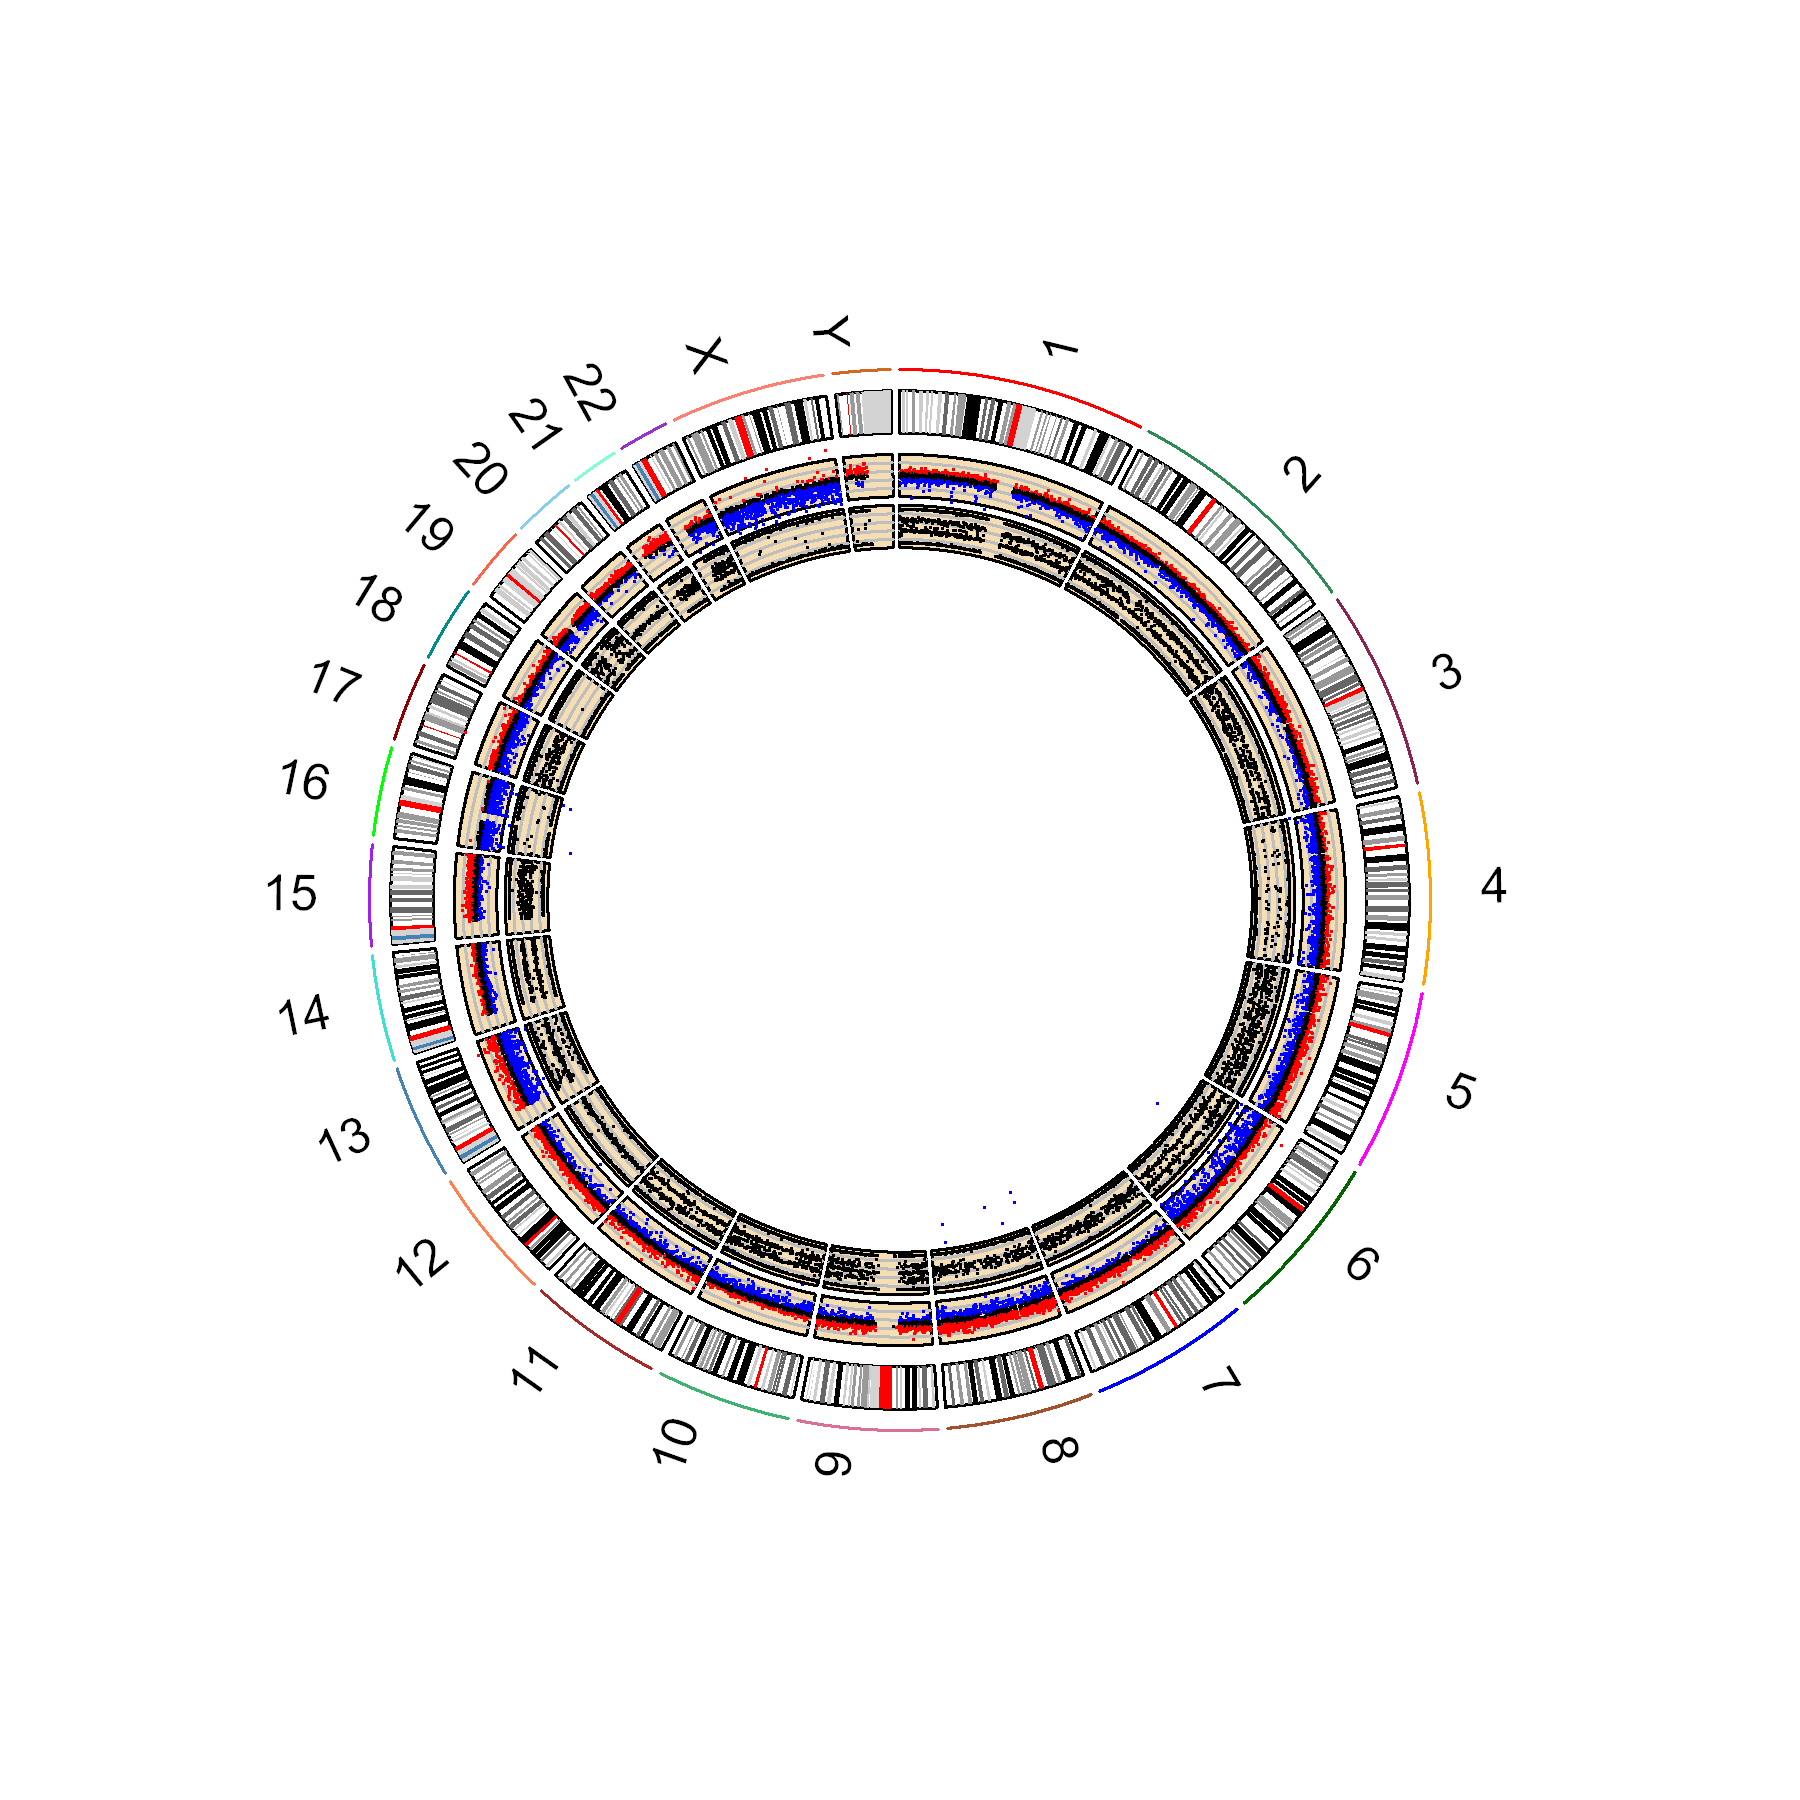

In [47]:
# for displaying in Jupyter
options(jupyter.plot_mimetypes = "image/png", repr.plot.width = 6, repr.plot.height = 6, repr.plot.res = 300)

# add the data to RCircos
RCircos.Set.Core.Components(cyto.info = dfChrom, chr.exclude = NULL, tracks.inside = 4, tracks.outside = 0)
RCircos.Set.Plot.Area()
RCircos.Chromosome.Ideogram.Plot() 
RCircos.Scatter.Plot(dfCNV, data.col = 4, track.num = 1, side = 'in', by.fold = 0.15, min.value = -1, max.value = 1)
RCircos.Scatter.Plot(dfBAF, data.col = 4, track.num = 2, side = 'in', min.value = 0, max.value = 1)

In [56]:
# so that I can use fread to deal with rows of differing number of columns
library(data.table)

In [59]:
# I need a way to process this file to remove the extra columns before reading in?
# read in the junctions data and fix the column names
dfLinks <- fread('data/VCaP-highConfidenceJunctions.tsv', header = TRUE, skip = 11)

# select the necessary columns
dfLinks <- dfLinks[, c(2, 3, 6, 7)]

# colnames(dfBAF) <- c('chromosome','start','stop','value')

# # remove any extra chromosomes that are not in the ideogram
# extras <- c('chrMT')
# dfBAF <- subset(dfBAF, !(chromosome %in% extras))

# # create a column with the chromosome number or string for sorting
# dfBAF$chromosomeID <- gsub("chr","",as.character(dfBAF$chromosome))

# # randomly select 25000 lines (otherwise the plot is too full and takes too long to create)
# dfBAF <- dfBAF[sample(nrow(dfBAF), 25000), ]

# # sort by chromosomeID
# dfBAF <- dfBAF[str_order(dfBAF$chromosomeID, numeric = TRUE),]

head(dfLinks)

LeftChr,LeftPosition,RightChr,RightPosition
<chr>,<int>,<chr>,<int>
chr1,815629,chr1,5649523
chr1,816163,chr1,5650075
chr1,816176,chr1,5650768
chr1,859347,chr1,860187
chr1,2556114,chr1,2556490
chr1,3408414,chr1,3408528


In [48]:
data(RCircos.Link.Data)
RCircos.Link.Data

Chromosome,chromStart,chromEnd,Chromosome.1,chromStart.1,chromEnd.1
<fct>,<int>,<int>,<fct>,<int>,<int>
chr1,8284703,8285399,chr1,8285752,8286389
chr1,85980143,85980624,chr7,123161313,123161687
chr1,118069850,118070319,chr1,118070329,118070689
chr1,167077258,167077658,chr1,169764630,169764965
chr1,171671272,171671550,chr1,179790879,179791292
chr1,174333479,174333875,chr6,101861516,101861840
chr1,180400166,180400508,chr1,180400300,180400448
chr1,182418600,182419044,chr2,217267659,217268095
chr1,196200764,196201192,chr2,217251034,217251418
